In [1]:
import skimage.io
import skimage.feature
import sys
import matplotlib.pyplot as plt
import rioxarray
import sys
import cv2 as cv

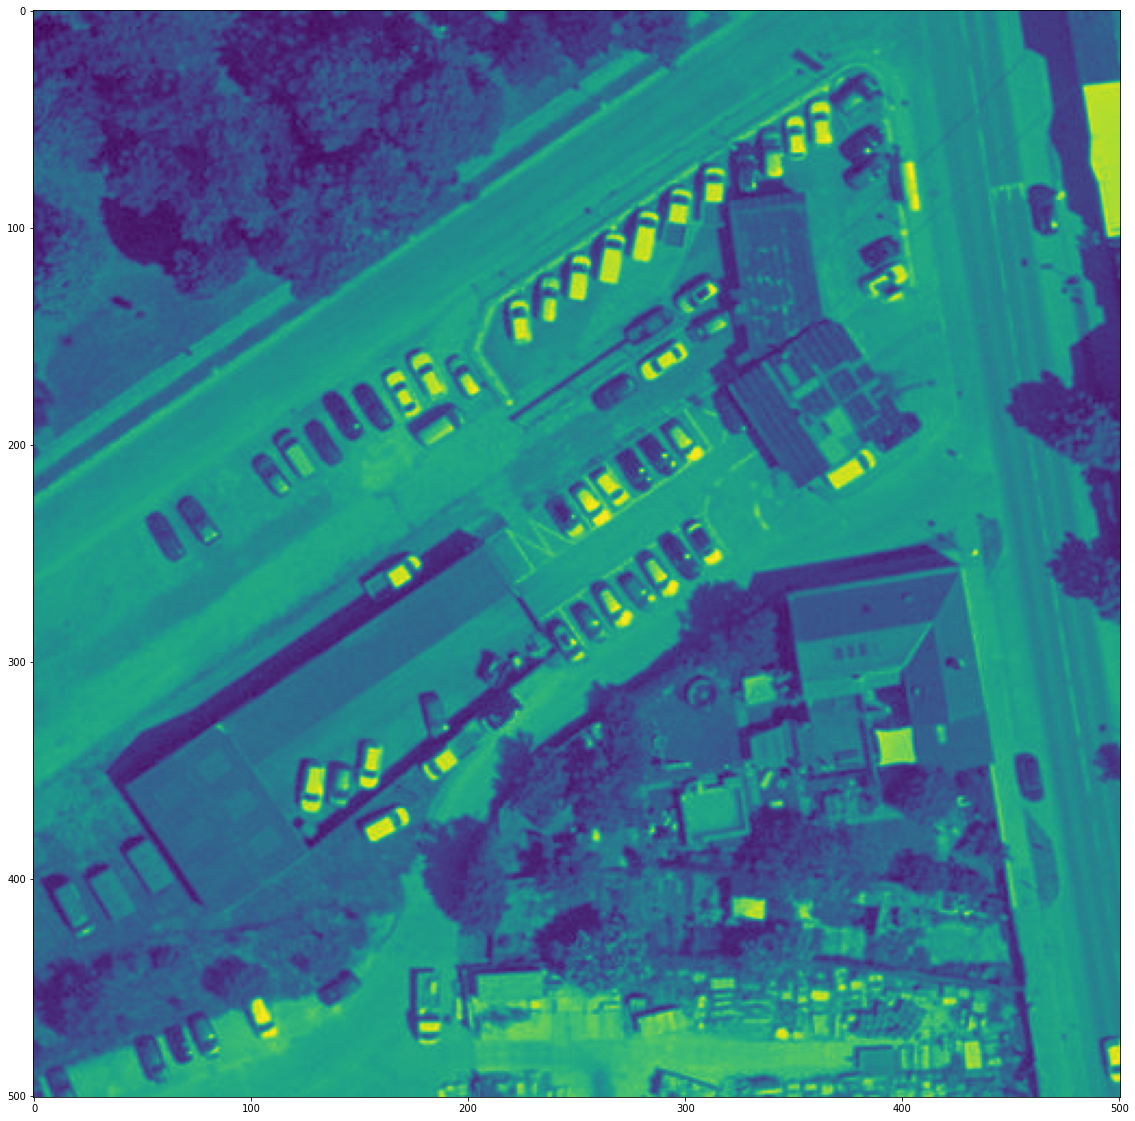

In [3]:
filename="tilesForFilterTesting/tifclip5.tif"
image = skimage.io.imread(fname=filename, as_gray=True)
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

Filtrado Canny

In [5]:
edges_image = skimage.feature.canny(
    image=image,
    sigma=0,
    low_threshold=0.1,
    high_threshold=0.3,
)
#fig, ax = plt.subplots(figsize=(20, 20))
#ax.imshow(edges)
skimage.io.imsave("imagesProcessedByFilters/CannyFilter.tif", edges_image, plugin=None,check_contrast=True)


C:\Users\jcarvajal\AppData\Local\Temp\ipykernel_5744\2413047097.py:9: UserWarning: imagesProcessedByFilters/CannyFilter.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave("imagesProcessedByFilters/CannyFilter.tif", edges_image, plugin=None,check_contrast=True)


Filtro laplaciano con openCV

In [6]:
ddepth = cv.CV_16SC4
kernel_size = 3
window_name = "Laplace Demo"

# Load an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_COLOR)

# Remove noise by blurring with a Gaussian filter
src = cv.GaussianBlur(src, (3,3), 0)

# Convert the image to grayscale
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# Apply Laplace function
dst = cv.Laplacian(src_gray, ddepth, ksize=kernel_size)

# converting back to uint8
laplacian_image = cv.convertScaleAbs(dst)
#fig, ax = plt.subplots(figsize=(20, 20))
#ax.imshow(laplacian_image)
skimage.io.imsave("imagesProcessedByFilters/LaplacianFilter.tif", laplacian_image, plugin=None,check_contrast=True)


In [7]:
scale = 1
delta = 0
ddepth = cv.CV_16S
src = cv.imread(filename, cv.IMREAD_COLOR)
src = cv.GaussianBlur(src, (1, 1), 0)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
# Gradient-Y
#grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
sobel_image = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#fig, ax = plt.subplots(figsize=(20, 20))
#ax.imshow(sobel_image)
skimage.io.imsave("imagesProcessedByFilters/SobelFilter.tif", sobel_image, plugin=None,check_contrast=True)



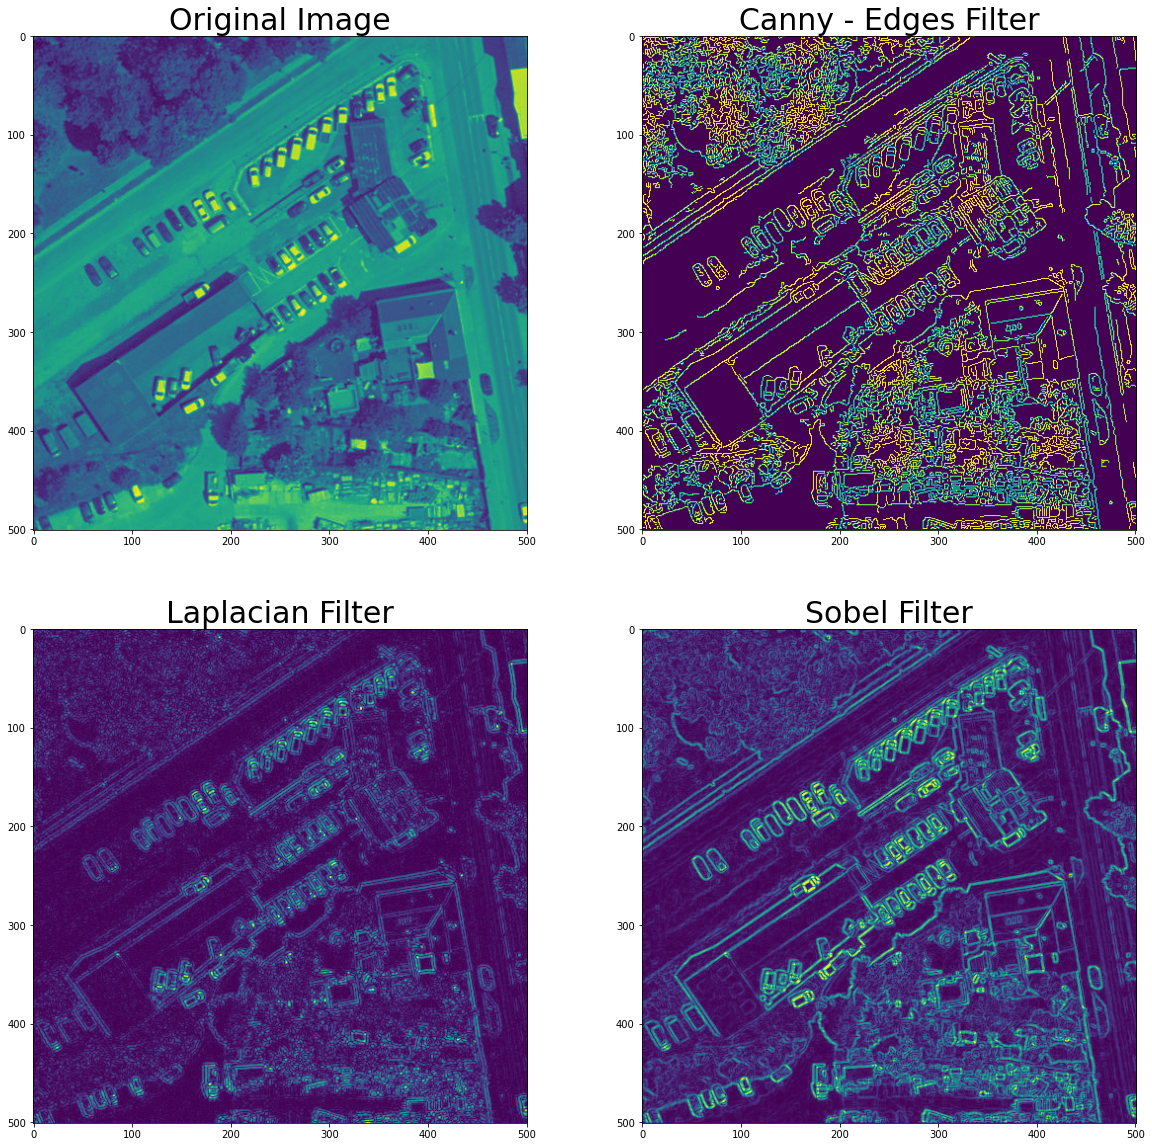

In [8]:
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title('Original Image',fontsize = 30)
plt.imshow(image)
plt.subplot(222)
plt.title('Canny - Edges Filter',fontsize = 30)
plt.imshow(edges_image)
plt.subplot(223)
plt.title('Laplacian Filter',fontsize = 30)
plt.imshow(laplacian_image)
plt.subplot(224)
plt.title('Sobel Filter',fontsize = 30)
plt.imshow(sobel_image)
plt.show()

